<a href="https://colab.research.google.com/github/riazahmedmahin/Thesiss/blob/main/(cnn_RF_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


Healthy images: 306
Reject images: 414
Healthy Images:


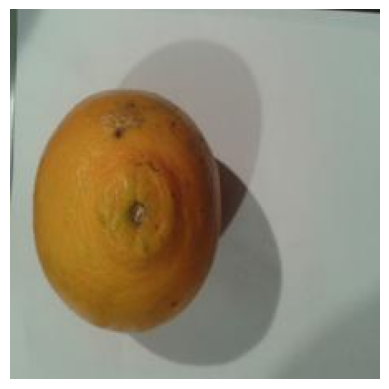

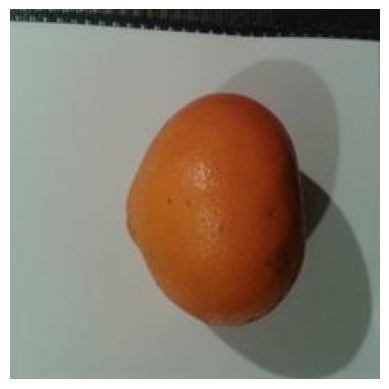

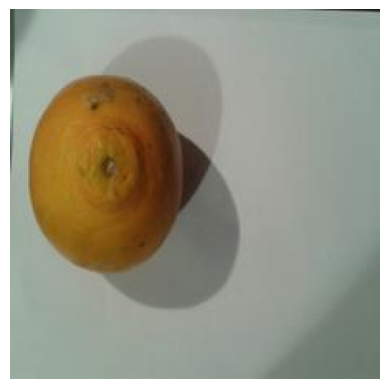

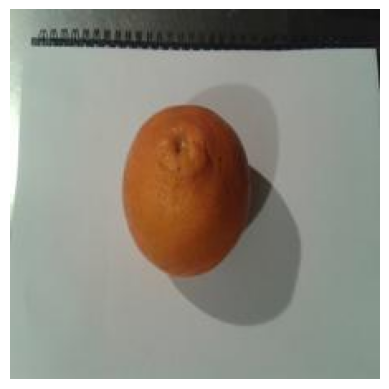

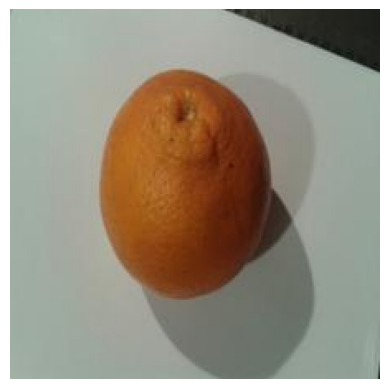

Reject Images:


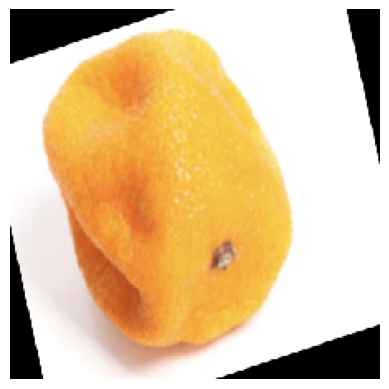

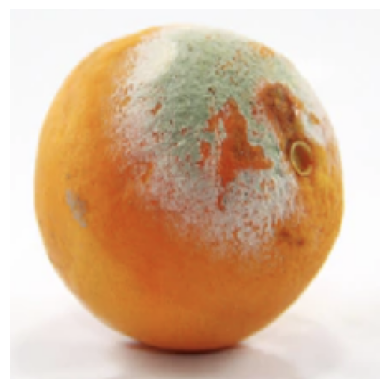

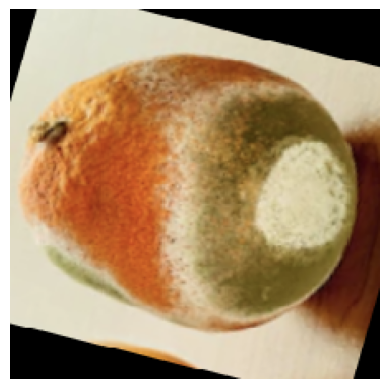

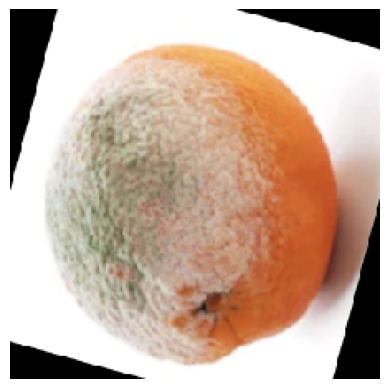

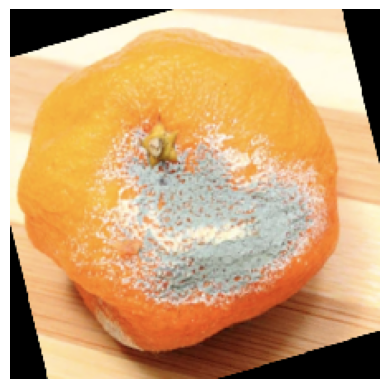

In [ ]:
# Dataset path
batch_1_path = '/content/drive/MyDrive/Colab Notebooks/Orage Dataset/batch 1'

# Load dataset
healthy_images = glob.glob(os.path.join(batch_1_path, 'healthy', '*.jpg'))
reject_images = glob.glob(os.path.join(batch_1_path, 'reject', '*.jpg'))

# Show how many images are in each class
print(f"Healthy images: {len(healthy_images)}")
print(f"Reject images: {len(reject_images)}")

# Display some images from each class to verify
def display_images(image_paths):
    for i in range(min(5, len(image_paths))):  # Display a maximum of 5 images
        img = image.load_img(image_paths[i], target_size=(224, 224))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Display healthy and reject images
print("Healthy Images:")
display_images(healthy_images)
print("Reject Images:")
display_images(reject_images)


In [ ]:
# Resize images to required size for each model separately
def load_and_resize_images(image_paths, target_size):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        images.append(img_array)
    return np.array(images)

# Resize for ResNet-50 (224x224)
healthy_resized_resnet = load_and_resize_images(healthy_images, target_size=(224, 224))
reject_resized_resnet = load_and_resize_images(reject_images, target_size=(224, 224))
X_resnet = np.concatenate((healthy_resized_resnet, reject_resized_resnet), axis=0)
y_resnet = np.array([0] * len(healthy_resized_resnet) + [1] * len(reject_resized_resnet))

# Resize for VGG-16 (224x224)
healthy_resized_vgg = load_and_resize_images(healthy_images, target_size=(224, 224))
reject_resized_vgg = load_and_resize_images(reject_images, target_size=(224, 224))
X_vgg = np.concatenate((healthy_resized_vgg, reject_resized_vgg), axis=0)
y_vgg = np.array([0] * len(healthy_resized_vgg) + [1] * len(reject_resized_vgg))

# Resize for InceptionV3 (299x299)
healthy_resized_inception = load_and_resize_images(healthy_images, target_size=(299, 299))
reject_resized_inception = load_and_resize_images(reject_images, target_size=(299, 299))
X_inception = np.concatenate((healthy_resized_inception, reject_resized_inception), axis=0)
y_inception = np.array([0] * len(healthy_resized_inception) + [1] * len(reject_resized_inception))

# Resize for EfficientNet-B3 (300x300)
healthy_resized_efficientnet = load_and_resize_images(healthy_images, target_size=(300, 300))
reject_resized_efficientnet = load_and_resize_images(reject_images, target_size=(300, 300))
X_efficientnet = np.concatenate((healthy_resized_efficientnet, reject_resized_efficientnet), axis=0)
y_efficientnet = np.array([0] * len(healthy_resized_efficientnet) + [1] * len(reject_resized_efficientnet))

print("Image resizing complete for ResNet, VGG, Inception, and EfficientNet models.")


Image resizing complete for ResNet, VGG, Inception, and EfficientNet models.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for augmentation with the same settings for each model
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalize and augment data for each model separately

# ResNet-50 (224x224)
X_resnet = X_resnet / 255.0  # Normalize to range [0, 1]
datagen.fit(X_resnet)

# VGG-16 (224x224)
X_vgg = X_vgg / 255.0  # Normalize to range [0, 1]
datagen.fit(X_vgg)

# InceptionV3 (299x299)
X_inception = X_inception / 255.0  # Normalize to range [0, 1]
datagen.fit(X_inception)

# EfficientNet-B3 (300x300)
X_efficientnet = X_efficientnet / 255.0  # Normalize to range [0, 1]
datagen.fit(X_efficientnet)

print("Data normalization and augmentation setup complete for ResNet, VGG, Inception, and EfficientNet models.")


Data normalization and augmentation setup complete for ResNet, VGG, Inception, and EfficientNet models.


In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3, EfficientNetB3
from tensorflow.keras.models import Model
import joblib
import os

# Define the path to save extracted features
feature_save_path = '/content/drive/MyDrive/Colab Notebooks/Orage Dataset/ExtractedFeature/CNN_RF'
os.makedirs(feature_save_path, exist_ok=True)  # Create directory if it doesn't exist

# Function to load model, preprocess, and extract features
def extract_features(model, model_name, data, batch_size=32):
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    features = feature_extractor.predict(data, batch_size=batch_size, verbose=1)
    joblib.dump(features, os.path.join(feature_save_path, f"{model_name}_features.pkl"))
    print(f"{model_name} feature extraction complete and saved.")
    return features

# Load each model and extract features

# ResNet-50
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
resnet_features = extract_features(resnet_model, 'ResNet50', X_resnet)

# VGG-16
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
vgg_features = extract_features(vgg_model, 'VGG16', X_vgg)

# InceptionV3
inception_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg', input_shape=(299, 299, 3))
inception_features = extract_features(inception_model, 'InceptionV3', X_inception)

# EfficientNet-B3
efficientnet_model = EfficientNetB3(weights='imagenet', include_top=False, pooling='avg', input_shape=(300, 300, 3))
efficientnet_features = extract_features(efficientnet_model, 'EfficientNetB3', X_efficientnet)

print("Feature extraction completed for all models.")


23/23 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step
ResNet50 feature extraction complete and saved.
23/23 ━━━━━━━━━━━━━━━━━━━━ 468s 20s/step
VGG16 feature extraction complete and saved.
23/23 ━━━━━━━━━━━━━━━━━━━━ 196s 8s/step
InceptionV3 feature extraction complete and saved.
23/23 ━━━━━━━━━━━━━━━━━━━━ 236s 10s/step
EfficientNetB3 feature extraction complete and saved.
Feature extraction completed for all models.


In [ ]:
# Helper function to load features, flatten them, split data, and train Random Forest (RF)
def train_rf_on_features(feature_path, labels, model_name, n_estimators=100):
    # Load features
    features = joblib.load(feature_path)

    # Flatten features to 2D
    features = features.reshape(features.shape[0], -1)  # Flatten each feature vector

    # Split the dataset into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Initialize and train Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=["Healthy", "Reject"]))
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))

    return rf

# Train and evaluate Random Forest classifiers on each model's features

# ResNet-50 RF
resnet_rf = train_rf_on_features(
    os.path.join(feature_save_path, "ResNet50_features.pkl"),
    y_resnet,
    "ResNet-50"
)

# VGG-16 RF
vgg_rf = train_rf_on_features(
    os.path.join(feature_save_path, "VGG16_features.pkl"),
    y_vgg,
    "VGG-16"
)

# InceptionV3 RF
inception_rf = train_rf_on_features(
    os.path.join(feature_save_path, "InceptionV3_features.pkl"),
    y_inception,
    "InceptionV3"
)

# EfficientNet-B3 RF
efficientnet_rf = train_rf_on_features(
    os.path.join(feature_save_path, "EfficientNetB3_features.pkl"),
    y_efficientnet,
    "EfficientNetB3"
)

print("Random Forest Training and Evaluation completed for all models.")



ResNet-50 Random Forest Classifier Accuracy: 91.67%
              precision    recall  f1-score   support

     Healthy       0.98      0.83      0.90        66
      Reject       0.88      0.99      0.93        78

    accuracy                           0.92       144
   macro avg       0.93      0.91      0.91       144
weighted avg       0.92      0.92      0.92       144

Confusion Matrix for ResNet-50:
 [[55 11]
 [ 1 77]]

VGG-16 Random Forest Classifier Accuracy: 93.06%
              precision    recall  f1-score   support

     Healthy       0.98      0.86      0.92        66
      Reject       0.90      0.99      0.94        78

    accuracy                           0.93       144
   macro avg       0.94      0.93      0.93       144
weighted avg       0.94      0.93      0.93       144

Confusion Matrix for VGG-16:
 [[57  9]
 [ 1 77]]

InceptionV3 Random Forest Classifier Accuracy: 96.53%
              precision    recall  f1-score   support

     Healthy       1.00      0.9

In [ ]:
import time
def train_rf_on_features_with_time(feature_path, labels, model_name, n_estimators=100):
    # Load features
    features = joblib.load(feature_path)

    # Flatten features to 2D
    features = features.reshape(features.shape[0], -1)  # Flatten each feature vector

    # Split the dataset into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Initialize Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Measure training time
    start_train_time = time.time()
    rf.fit(X_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    # Measure testing time
    start_test_time = time.time()
    y_pred = rf.predict(X_test)
    end_test_time = time.time()
    test_time = end_test_time - start_test_time

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=["Healthy", "Reject"]))
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))

    # Print train and test times
    print(f"{model_name} - Training Time: {train_time:.4f} seconds")
    print(f"{model_name} - Testing Time: {test_time:.4f} seconds")

    return rf, train_time, test_time


In [ ]:
# Train and evaluate Random Forest classifiers on each model's features and capture time

# ResNet-50 RF
resnet_rf, resnet_train_time, resnet_test_time = train_rf_on_features_with_time(
    os.path.join(feature_save_path, "ResNet50_features.pkl"),
    y_resnet,
    "ResNet-50"
)

# VGG-16 RF
vgg_rf, vgg_train_time, vgg_test_time = train_rf_on_features_with_time(
    os.path.join(feature_save_path, "VGG16_features.pkl"),
    y_vgg,
    "VGG-16"
)

# InceptionV3 RF
inception_rf, inception_train_time, inception_test_time = train_rf_on_features_with_time(
    os.path.join(feature_save_path, "InceptionV3_features.pkl"),
    y_inception,
    "InceptionV3"
)

# EfficientNet-B3 RF
efficientnet_rf, efficientnet_train_time, efficientnet_test_time = train_rf_on_features_with_time(
    os.path.join(feature_save_path, "EfficientNetB3_features.pkl"),
    y_efficientnet,
    "EfficientNetB3"
)

# Print summary of times
print("\nSummary of Training and Testing Times:")
print(f"ResNet-50 Training Time: {resnet_train_time:.4f} seconds, Testing Time: {resnet_test_time:.4f} seconds")
print(f"VGG-16 Training Time: {vgg_train_time:.4f} seconds, Testing Time: {vgg_test_time:.4f} seconds")
print(f"InceptionV3 Training Time: {inception_train_time:.4f} seconds, Testing Time: {inception_test_time:.4f} seconds")
print(f"EfficientNetB3 Training Time: {efficientnet_train_time:.4f} seconds, Testing Time: {efficientnet_test_time:.4f} seconds")



ResNet-50 Random Forest Classifier Accuracy: 91.67%
              precision    recall  f1-score   support

     Healthy       0.98      0.83      0.90        66
      Reject       0.88      0.99      0.93        78

    accuracy                           0.92       144
   macro avg       0.93      0.91      0.91       144
weighted avg       0.92      0.92      0.92       144

Confusion Matrix for ResNet-50:
 [[55 11]
 [ 1 77]]
ResNet-50 - Training Time: 3.3323 seconds
ResNet-50 - Testing Time: 0.0192 seconds

VGG-16 Random Forest Classifier Accuracy: 93.06%
              precision    recall  f1-score   support

     Healthy       0.98      0.86      0.92        66
      Reject       0.90      0.99      0.94        78

    accuracy                           0.93       144
   macro avg       0.94      0.93      0.93       144
weighted avg       0.94      0.93      0.93       144

Confusion Matrix for VGG-16:
 [[57  9]
 [ 1 77]]
VGG-16 - Training Time: 2.3090 seconds
VGG-16 - Testing Tim